In [85]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [251]:
def crossprod(x1,x2):
    x = np.cross(x1.transpose(),x2.transpose())
    perp = x / np.linalg.norm(x)
    return(perp)

def leasesquareapprox(x1,x2,y):
    a = np.matrix([x1,x2]).transpose()
    xhat = np.linalg.pinv(a.transpose()@a) @ (a.transpose()@y)
    ax = a@xhat
    return ax

# np.linalg.pinv(a.transpose()@a)  
# np.linalg.pinv(a.transpose()@a)@(a.transpose()@y)
#(a.transpose()@a)@np.linalg.pinv(a)@a.transpose()

In [258]:
x1 = np.array([0.1,0.1,0.2])

x2 = np.array([0.5,0.6,0.4])

y = np.array([[0.1,0.4,0.8]]).transpose()

print('orthogonal unit vector w',crossprod(x1,x2))

print('projection of y onto subspace',leasesquareapprox(x1,x2,y))



orthogonal unit vector w [-0.79602975  0.59702231  0.09950372]
projection of y onto subspace [[0.29009901]
 [0.25742574]
 [0.77623762]]


In [427]:
d0 = pd.read_csv('/Users/michaelguel/Downloads/archive-2/mnist_train.csv')

d0 = d0[d0['label'] < 4]

l = d0['label']

d = d0.drop("label",axis=1)

d = np.array(d)

x0 = d0[d0['label'] == 0]

x0 = np.array(x0.drop("label", axis = 1))

x0 = x0[0:50]

x1 = d0[d0['label'] == 1]

x1 = np.array(x1.drop("label", axis = 1))

x1 = x1[0:50]

x2 = d0[d0['label'] == 2]

x2 = np.array(x2.drop("label", axis = 1))

x2 = x2[0:50]

x3 = d0[d0['label'] == 3]

x3 = np.array(x3.drop("label", axis = 1))

x3 = x3[0:50]


In [438]:
al = np.vstack([x0,x1,x2,x3])

al.shape

(200, 784)

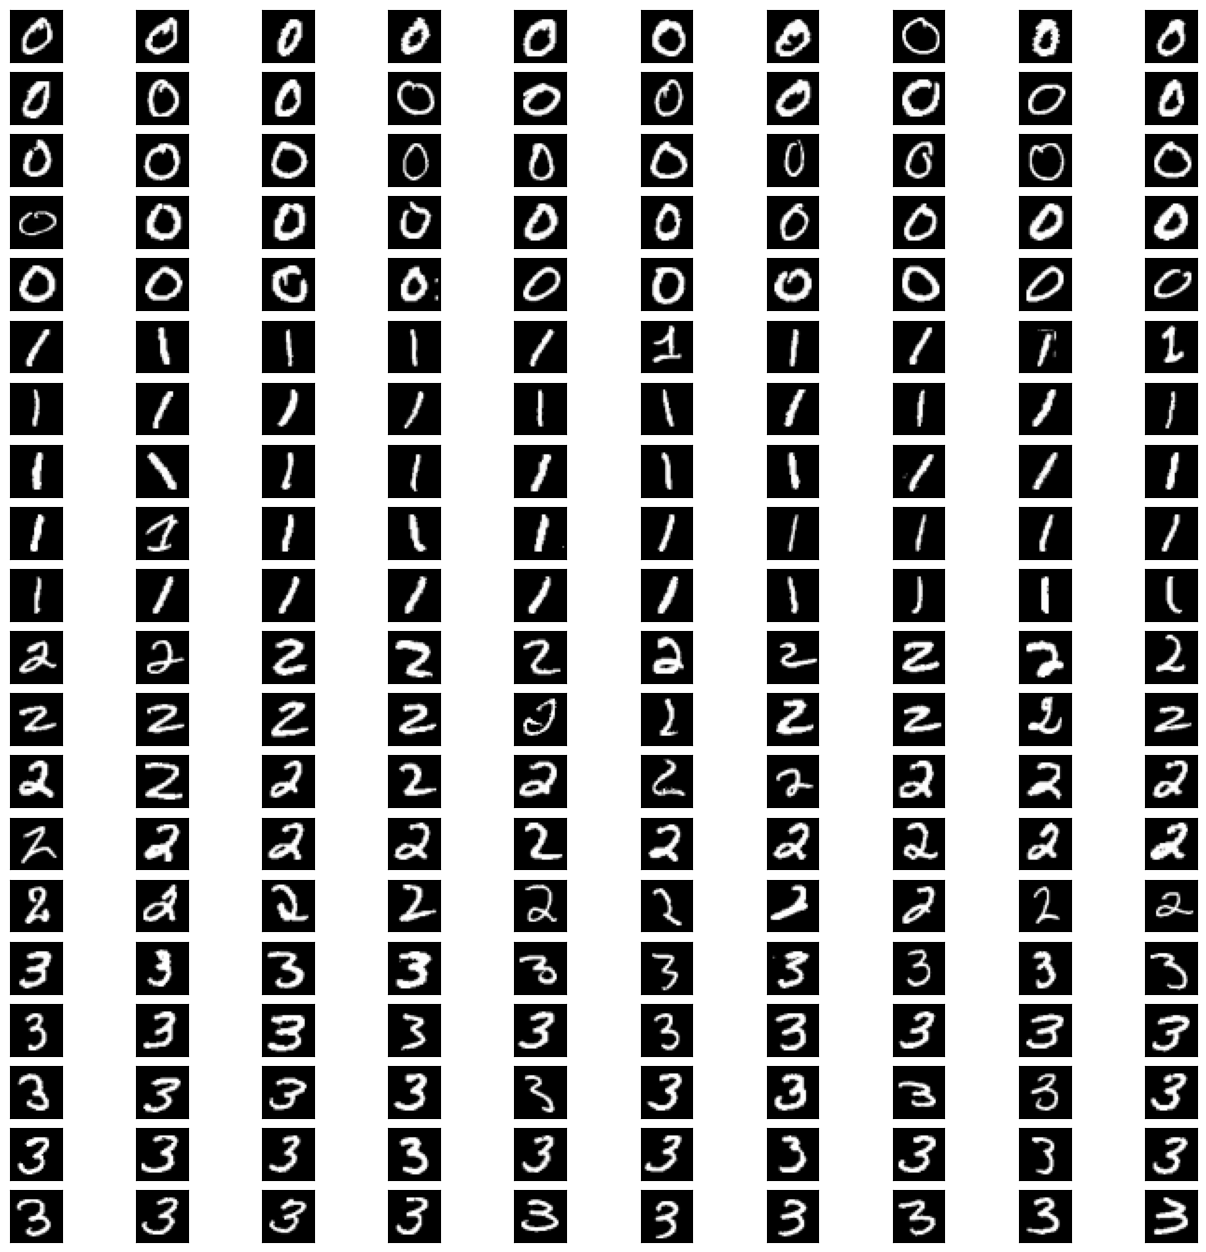

In [446]:
fig = plt.figure(figsize=(16,16))
for i in range(200):
    ax = fig.add_subplot(20, 10, i+1, xticks=[],yticks=[])
    ax.imshow(al[i].reshape(28,28), cmap = 'gray')

plt.show()

In [618]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
n = 2

In [619]:
dscale = StandardScaler().fit_transform(al)
pca = PCA(n_components = n)
pca.fit(dscale)

PCA(n_components=2)

In [620]:
dscale.shape

(200, 784)

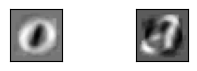

In [621]:
fig = plt.figure(figsize=(16,16))
for i in range(n):
    ax = fig.add_subplot(20, 10, i+1, xticks = [], yticks = [])
    ax.imshow(pca.components_[i].reshape(28,28), cmap = 'gray')

plt.show()

In [622]:
use = pca.transform(dscale)

use.shape

(200, 2)

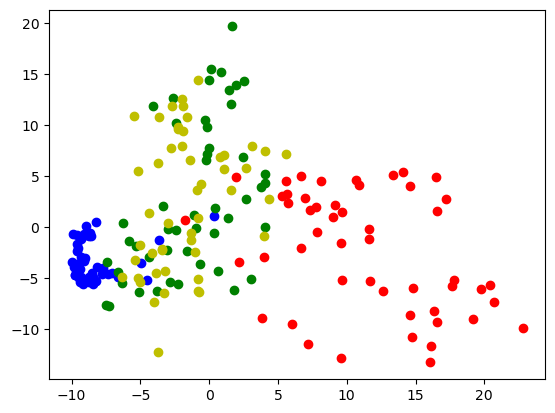

In [623]:
plt.scatter(use[0:50,0],use[0:50,1],color = 'r')
plt.scatter(use[51:100,0],use[51:100,1],color = 'b')
plt.scatter(use[101:150,0],use[101:150,1],color = 'g')
plt.scatter(use[151:200,0],use[151:200,1],color = 'y')

In [624]:
w = use@np.diag(pca.explained_variance_)@pca.components_

w.shape

(200, 784)

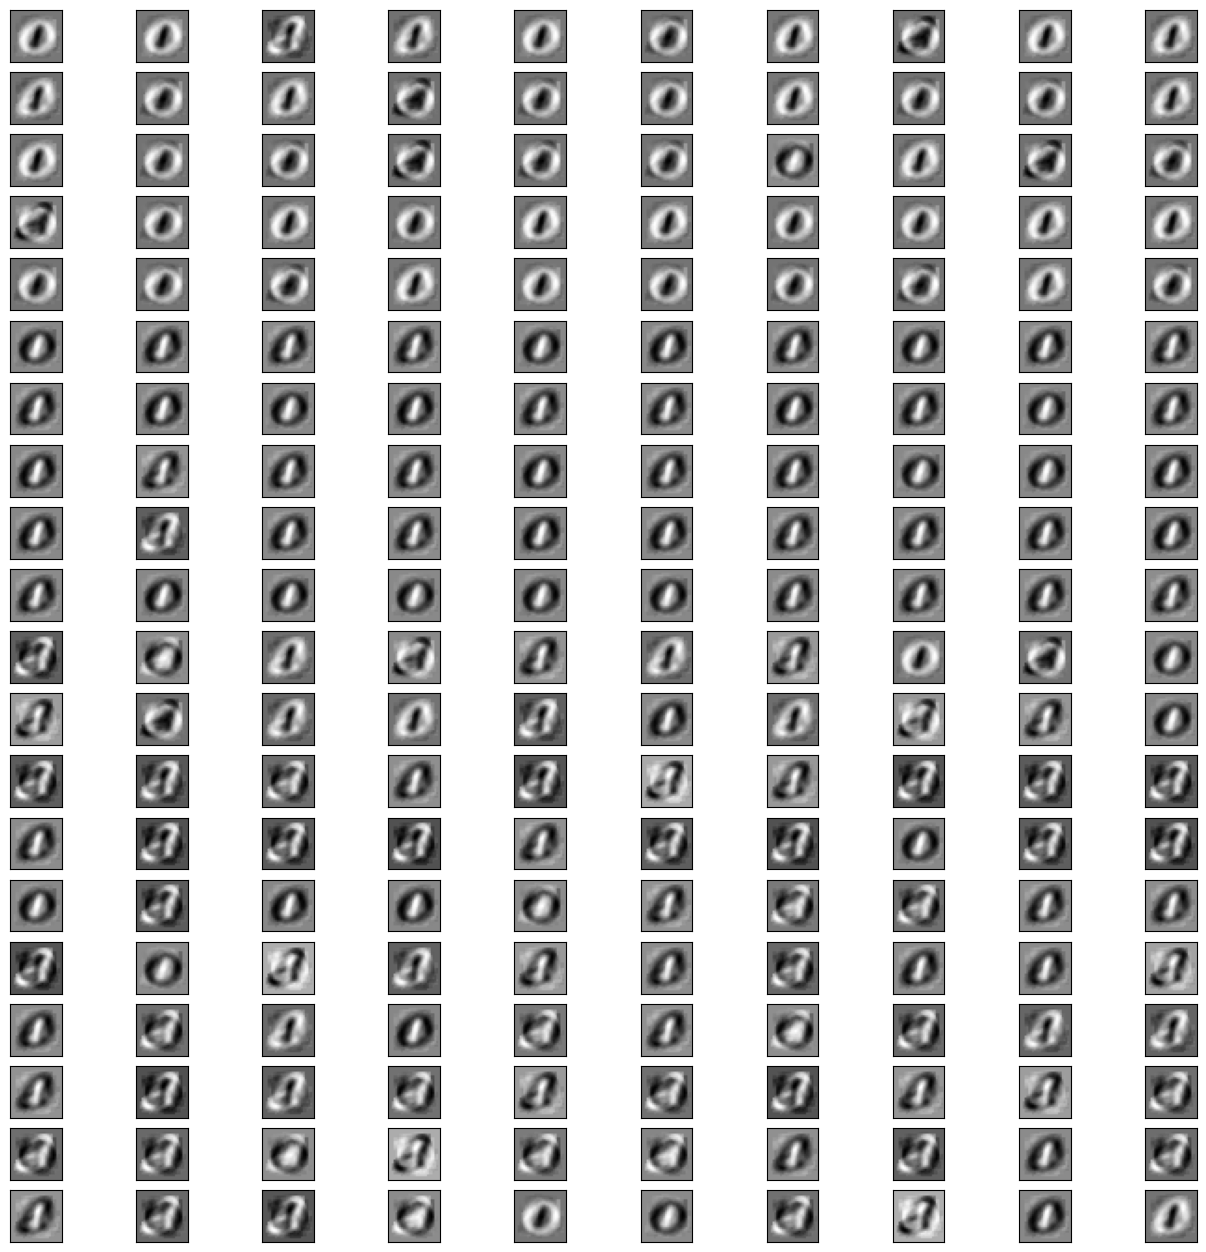

In [625]:
fig = plt.figure(figsize=(16,16))
for i in range(200):
    ax = fig.add_subplot(20, 10, i+1, xticks = [], yticks = [])
    ax.imshow(w[i].reshape(28,28), cmap = 'gray')

plt.show()



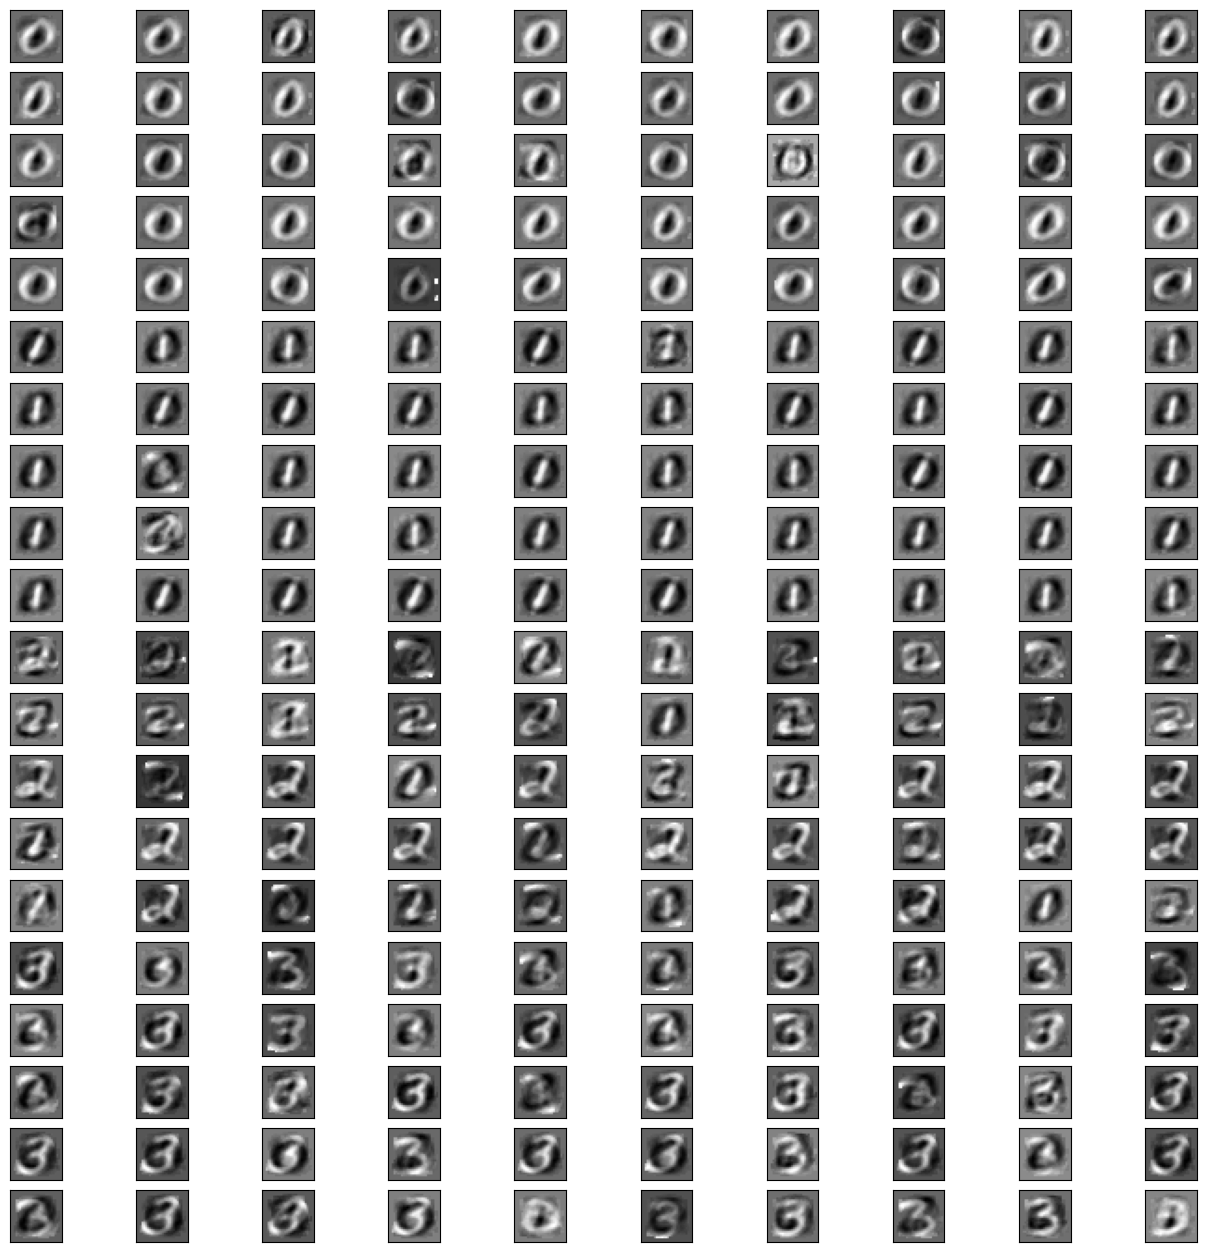

In [626]:
n = 50

dscale = StandardScaler().fit_transform(al)
pca = PCA(n_components = n)
pca.fit(dscale)

use = pca.transform(dscale)

use.shape

w = use@np.diag(pca.explained_variance_)@pca.components_

w.shape

fig = plt.figure(figsize=(16,16))
for i in range(200):
    ax = fig.add_subplot(20, 10, i+1, xticks = [], yticks = [])
    ax.imshow(w[i].reshape(28,28), cmap = 'gray')

plt.show()